**Aikins Acheampong**

Fall 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 4: Eigenletters — PCA on images of hand-drawn letters

Here, you will implement an algorithm that uses eigenvectors to reconstruct images based on how the deviate from the mean (i.e. average) image in a library of images. The original algorithm was applied to human faces (here is a [link](https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf) to original paper), but we are going to apply it to hand-written letters from the EMNIST data set ([link](https://www.nist.gov/itl/products-and-services/emnist-dataset))

### 4a. Load in the dataset of images of a letter

Run the code below to load in 4,800 images of a single letter (including lower and upper case versions). You can download the file for each letter separately. Change the letter to whichever letter you want (and file you downloaded).

In [2]:
letter = 'w' # You need to choose a letter from the data we made available.
letter_imgs = np.load(f'data/emnist_letter_{letter}.npy')

print(f'There are {letter_imgs.shape[0]} letters. There should be 4800.')
print(f'Shape of images is are {letter_imgs.shape} letters. It should be (4800, 28, 28).')

There are 4800 letters. There should be 4800.
Shape of images is are (4800, 28, 28) letters. It should be (4800, 28, 28).


### 4b. Look at the letter data

In the cell below, fill in the function to create a 12x10 subplots grid of plots (*12 rows, 10 columns*). For showing the image, use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html):

Run the function to create the plot of the letters below, with the title "Original".

**Note:**
- When you call `imshow`, add these optional parameters to create black-on-white images: `cmap='gray'`, `vmin=0`, and `vmax=255`
- Turn off the x and y ticks (they just add clutter).


In [40]:
def plot_letter( letter_imgs, title ):
    '''Creates a 12x10 grid of grayscale letter images.
    
    Parameters:
    -----------
    letter_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    title: string
        Title to display above all the subplots
    
    '''
    fig, axes = plt.subplots(12, 10, figsize=(15, 18))
    fig.suptitle(title, fontsize=20, y=0.92)

    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    for idx, ax in enumerate(axes.flat):
        if idx < len(letter_imgs):
            # img = letter_imgs[idx].reshape(28, 28)

            ax.imshow(letter_imgs[idx].real, cmap='gray', vmin=0, vmax=255)

            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.show()

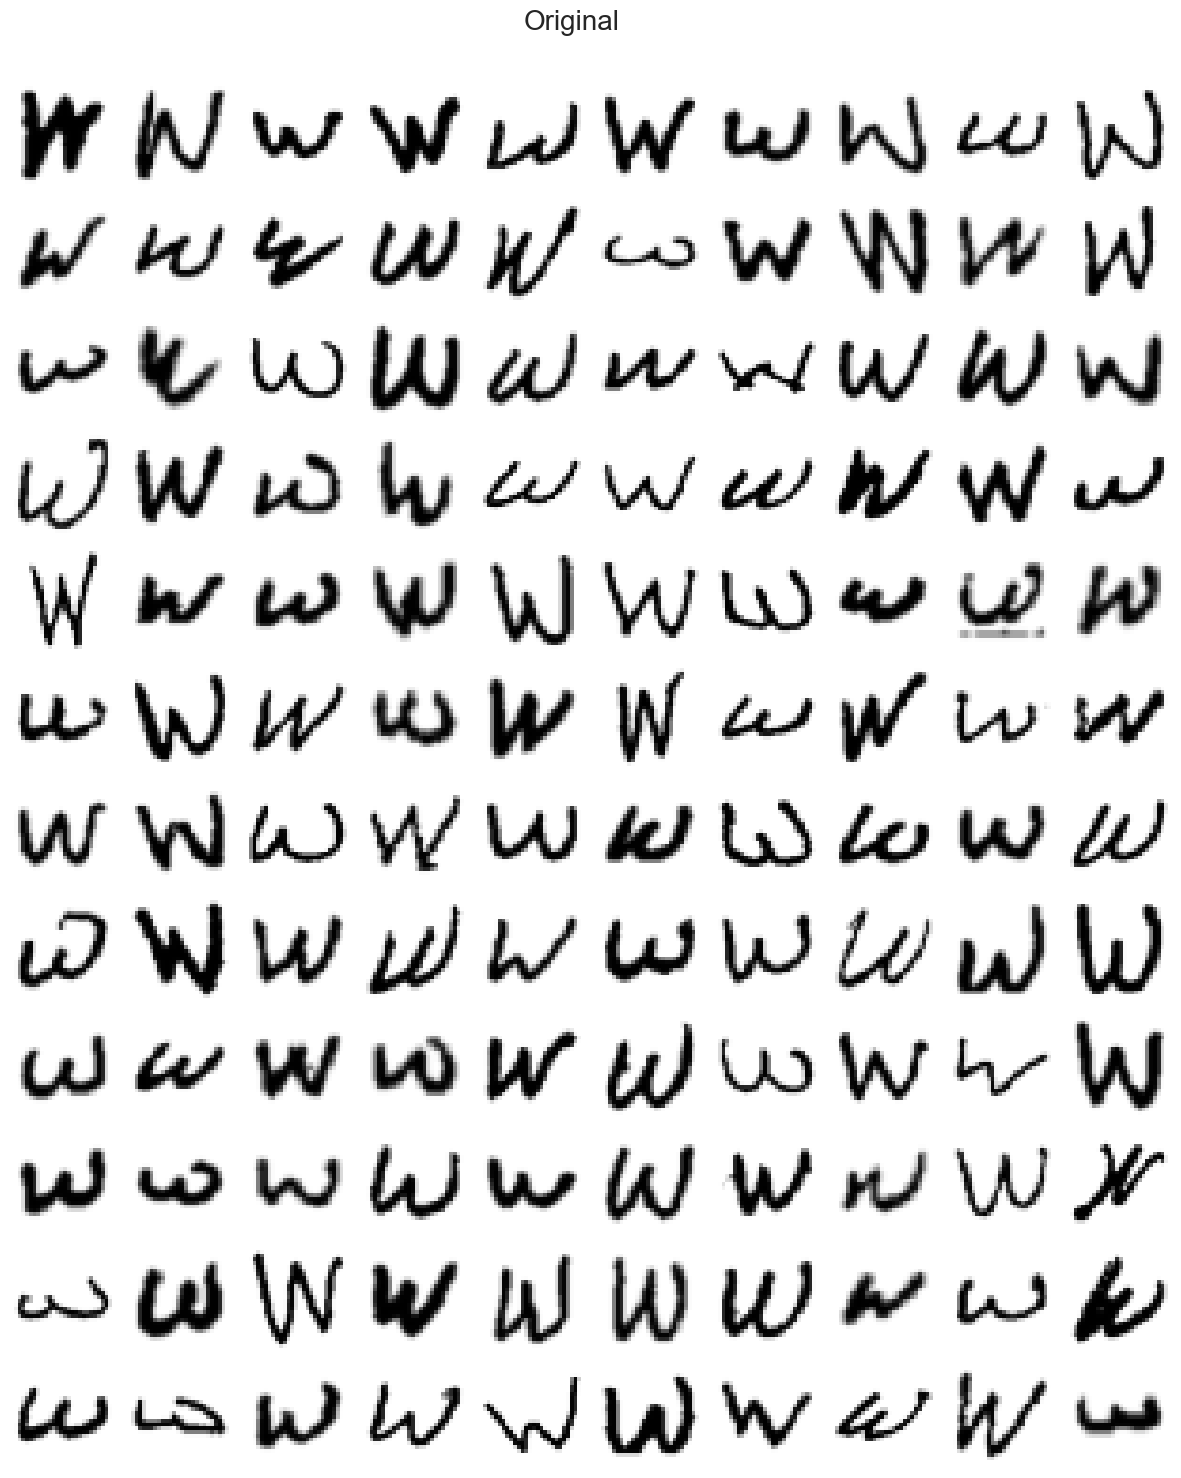

In [41]:
# Your code that calls plot_letter
plot_letter(letter_imgs, title='Original')

### 4c. Visualize the "mean letter"

Take the mean of the images and show it below.

**Note:** Use the same `cmap`, `vmin`, and `vmax` parameters as above and turn off x and y tick marks.

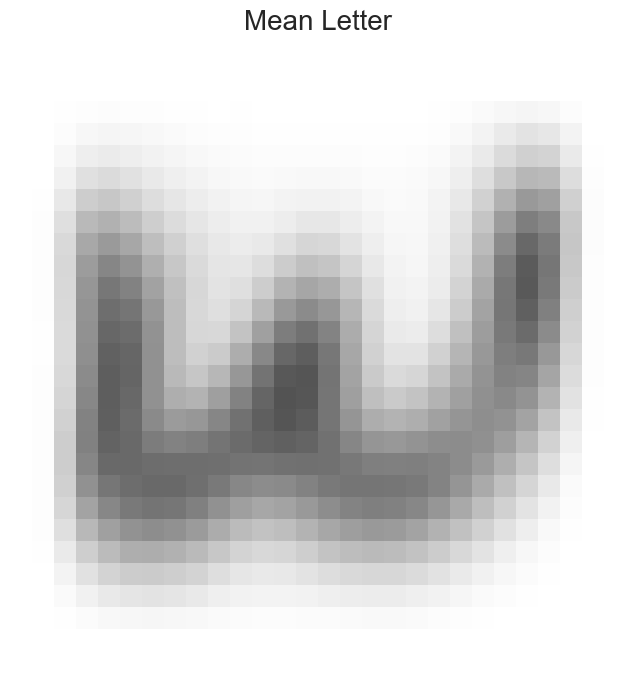

In [20]:
# Your code here
mean_letter = np.mean(letter_imgs, axis=0)

plt.figure(figsize=(8, 8))

plt.imshow(mean_letter.reshape(28, 28), 
            cmap='gray',
            vmin=0, 
            vmax=255)

plt.axis('off')

plt.title('Mean Letter', fontsize=20, pad=20)

plt.show()

### 4d. Preprocess letter data

In the letter dataset, each hand-written letter is a sample and each pixel is a variable. Currently, the latter data has shape = `(4800, 28, 28)` or $N = 4800$ samples and $M = 28*28 = 784$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(4800, 28*28)` = `(4800, 784)`. This will make a standard matrix and should work with your PCA code.


In the following cell, reshape the letter data **without hardcoding** ANY of (4800, 28*28)!

In [6]:
# Your reshape code here
n_samples = letter_imgs.shape[0]
n_pixels = letter_imgs.shape[1] * letter_imgs.shape[2]

reshaped_data = letter_imgs.reshape(n_samples, n_pixels)

print(f"Original shape: {letter_imgs.shape}")
print(f"Reshaped to: {reshaped_data.shape}")


Original shape: (4800, 28, 28)
Reshaped to: (4800, 784)


### 4e. Perform PCA on preprocessed letter data

Create pandas DataFrame object that holds the letter data then run PCA on the letter dataset. The header names of consecutive integers `0, 1, ..., 783` are fine. For the `vars` parameter in the `fit` method, pass in a Python list of ints (`0, 1, ..., 783`).

**Notes:**
- This is not a "toy" dataset so it might take a few minutes for the PCA to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.
- When running the PCA, do not normalize the data. We do not want to treat each pixel as a separate feature.

In [39]:
# Your code here

import time

n_samples = letter_imgs.shape[0]
n_pixels = letter_imgs.shape[1] * letter_imgs.shape[2]
letter_data_2d = letter_imgs.reshape(n_samples, n_pixels)

column_names = list(range(n_pixels))

letter_df = pd.DataFrame(letter_data_2d, columns=column_names)

print(f"Data shape after reshaping: {letter_df.shape}")

pca_letters = pca.PCA(letter_df)

start_time = time.time()

pca_letters.fit(vars=column_names, normalize_dataset=False)

elapsed_time = time.time() - start_time

print(f"\nPCA completed in {elapsed_time:.2f} seconds")

print("\nCumulative variance explained by first few PCs:")
for i, var in enumerate(pca_letters.cum_var[:5]):
    print(f"First {i+1} PC(s): {var:.3f}")

print(elapsed_time)


Data shape after reshaping: (4800, 784)

PCA completed in 0.77 seconds

Cumulative variance explained by first few PCs:
First 1 PC(s): 0.100-0.000j
First 2 PC(s): 0.181-0.000j
First 3 PC(s): 0.244-0.000j
First 4 PC(s): 0.302-0.000j
First 5 PC(s): 0.357-0.000j
0.7654819488525391


### 4f. Make letter PCA elbow plot

Make an elbow plot of the PCA results. Show **show only a reasonable number of PCs** to focus on the curve before it plateaus.

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


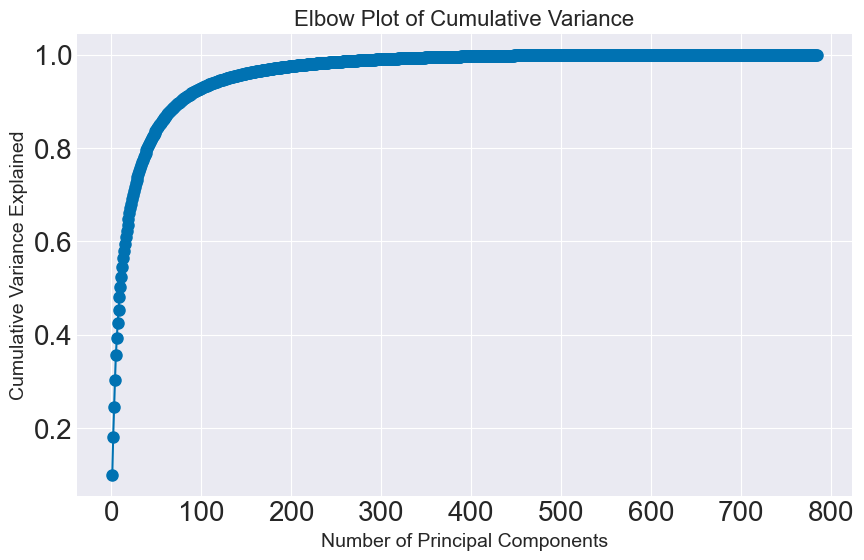

In [21]:
# elbow plot code here
pca_letters.elbow_plot()

### 4g. Reconstruct letters using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 20%
- 50%
- 95%

Outline of the general process:
1. For each of the above number of PCs, project them back onto the original data space.
2. Write then use the below `make_imgs` function to convert the projected data back to image shapes `(4800, 28, 28)`.
3. Use `plot_letter` to plot the reconstructed 1st 120 letters with each of the variance numbers above.

**There should be 3 12x10 plots below**

In [45]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    n_samples = reconstucted_imgs.shape[0]
    pixels = reconstucted_imgs.shape[1]
    
    side_length = int(np.sqrt(pixels))
    
    reconstucted_imgs = np.reshape(reconstucted_imgs,(n_samples, side_length, side_length))
    
    return reconstucted_imgs


#### Reconstructed letters with increasing accuracy

PCs needed for each threshold:
20% variance: 3 PCs
50% variance: 10 PCs
95% variance: 130 PCs


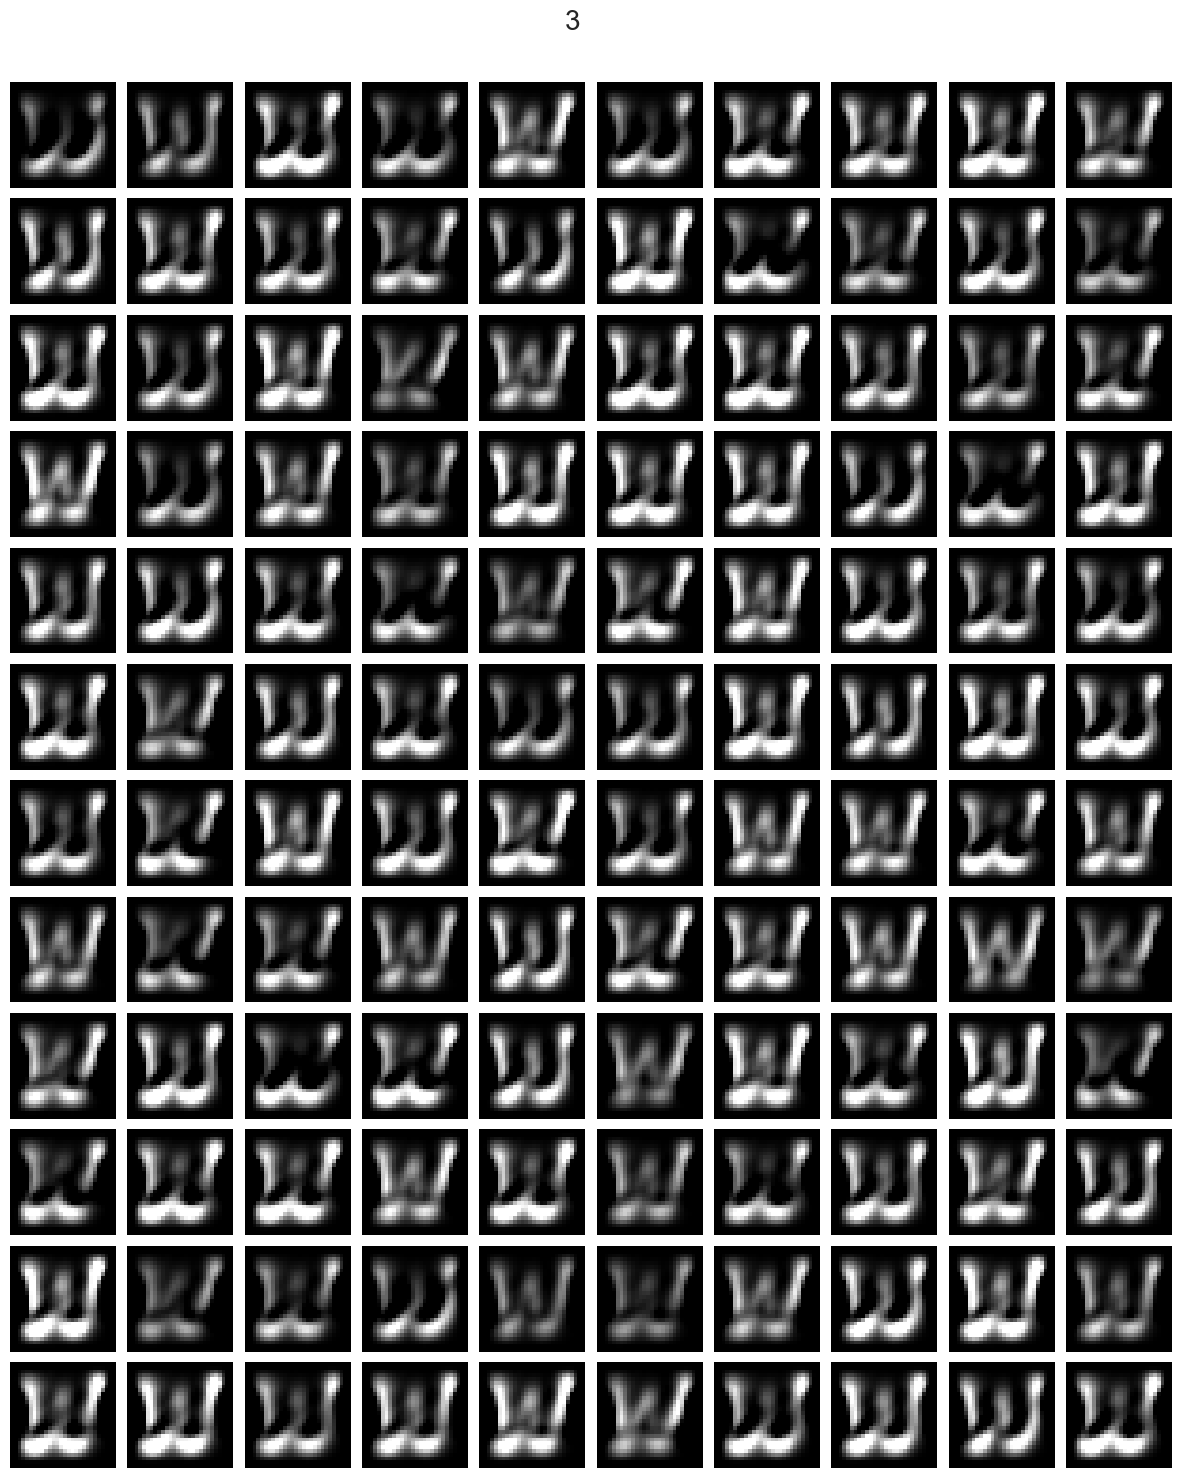

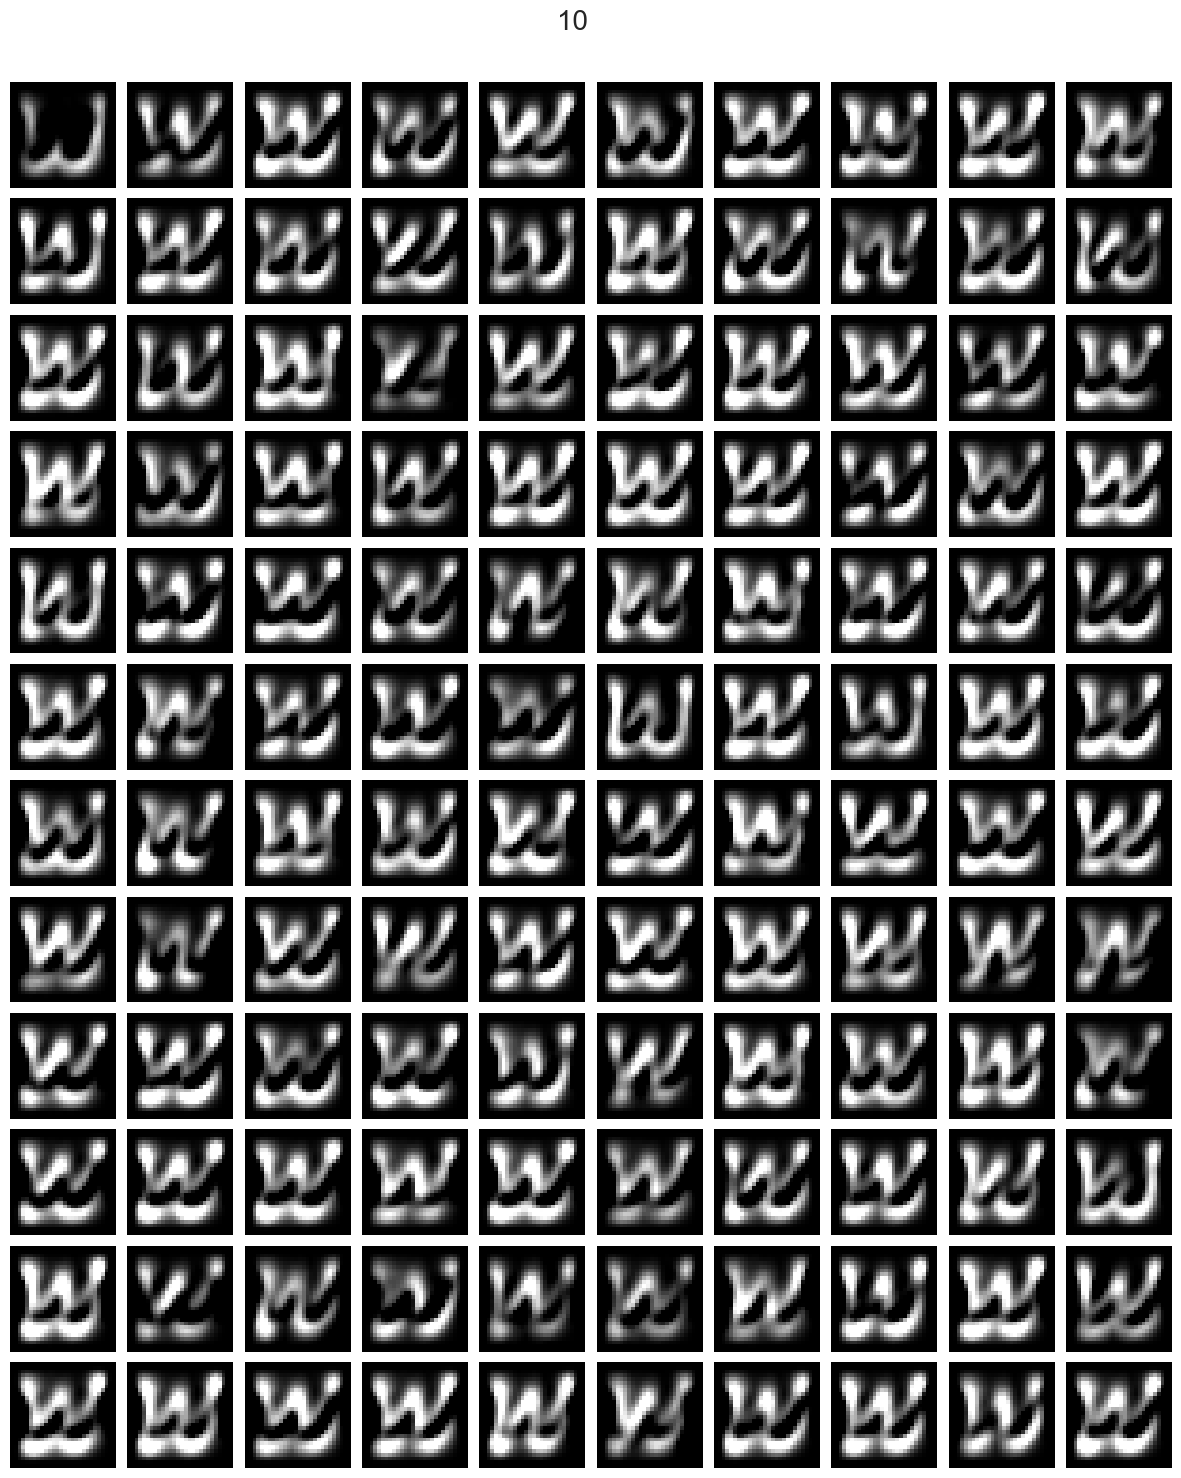

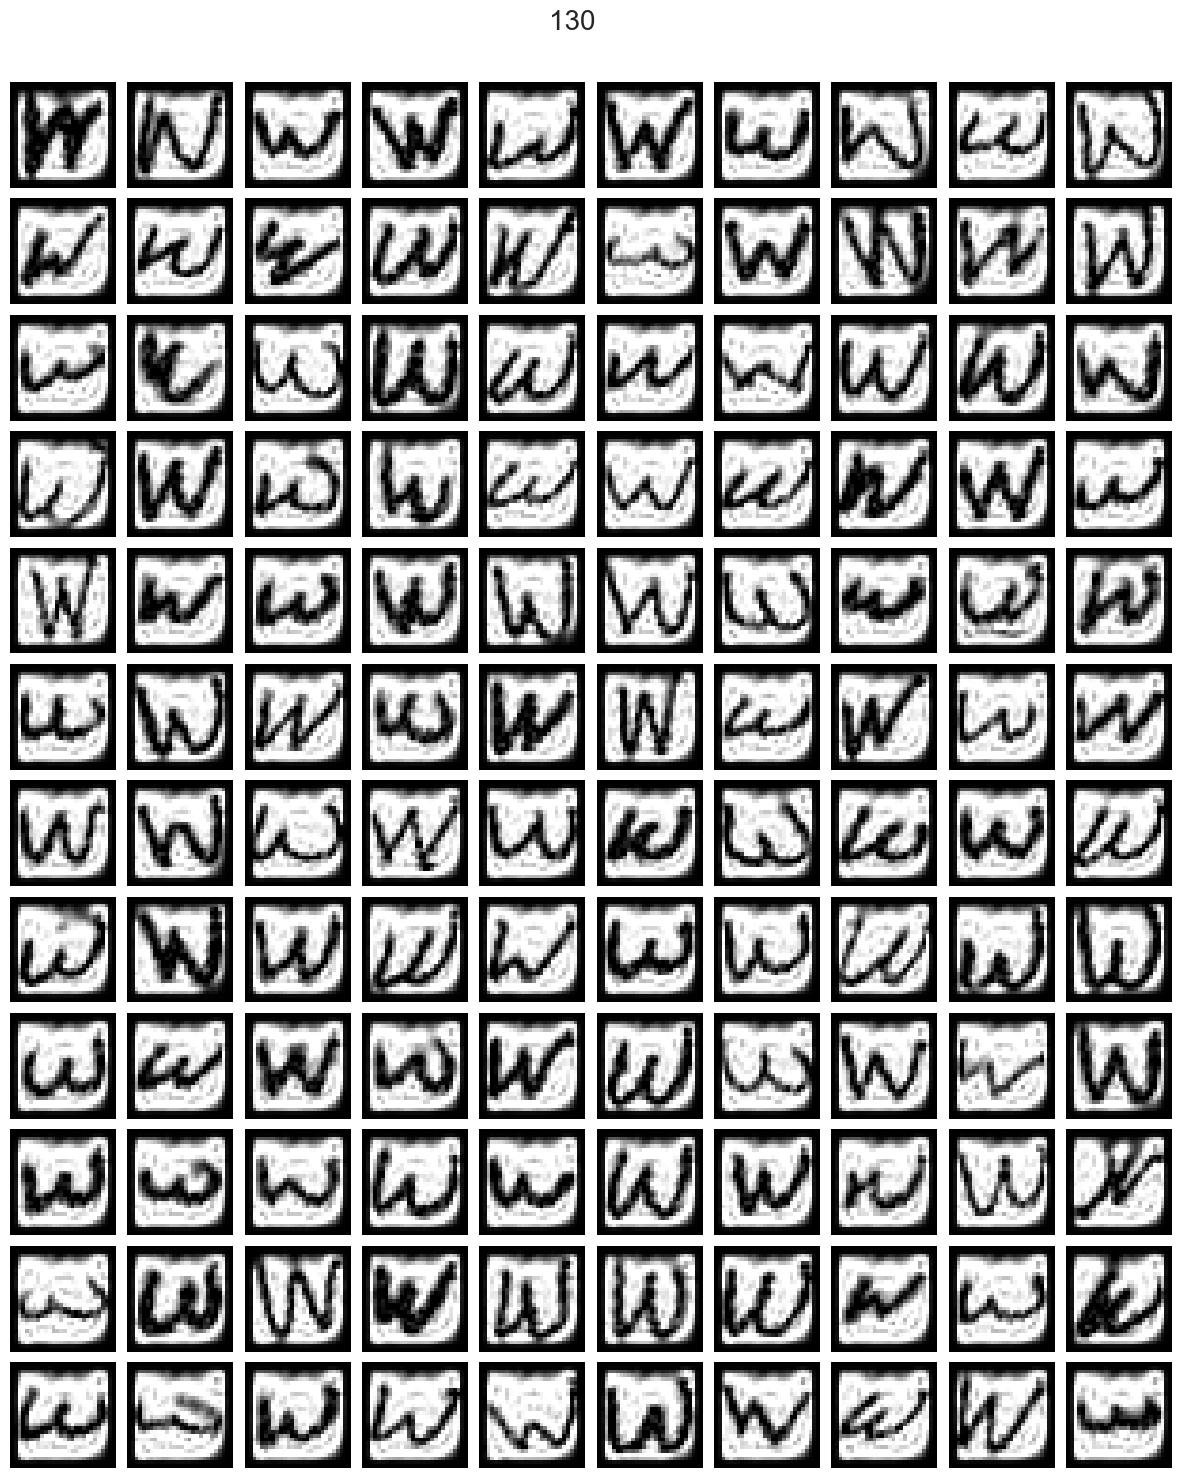

In [44]:
# Your code here

def find_pcs_for_variance(pca_obj, target_variance):
    """Find number of PCs needed for target variance"""
    cum_var = np.array(pca_obj.cum_var)
    return np.searchsorted(cum_var, target_variance) + 1

pc_20 = find_pcs_for_variance(pca_letters, 0.20)
pc_50 = find_pcs_for_variance(pca_letters, 0.50)
pc_95 = find_pcs_for_variance(pca_letters, 0.95)

print(f"PCs needed for each threshold:")
print(f"20% variance: {pc_20} PCs")
print(f"50% variance: {pc_50} PCs")
print(f"95% variance: {pc_95} PCs")

for n_pcs, target_var in [(pc_20, 0.20), (pc_50, 0.50), (pc_95, 0.95)]:
    reconstructed = pca_letters.pca_then_project_back((int(n_pcs)))
    
    # actual_var = pca_letters.cum_var[n_pcs-1]

    plot_letter(make_imgs(reconstructed), title=n_pcs)

### 4h. Questions

**Question 12:** Pick one of the letter samples to focus on. Choose one that undergoes a visually interesting transformation as more eigenvectors are used in the reconstruction. Describe what happens visually to the same sample over the course of the reconstructions. Set up 5 plots in a row. The first should be the mean letter (because that is what we start from when we do the reconstruction). The next three should be just that sample with each level of reconstruction (from worst to best). The final plot should be the original data for that sample. Your description should have at least 5 sentences in it.

**Answer 12:** 
The letter starts as a blurry vertical line from the mean. With 3 PCs, basic strokes appear but lack detail. Using 10 PCs reveals clearer diagonal elements. At 130 PCs, fine details and stroke variations become visible, closely matching the original's styles and sharp angles.

**Question 13:** Would it be effective to use the eigenvectors from one letter's data set to project and then project back (i.e. reduce and reconstruct) data from a different letter? 

Either write several sentences with your reasoning or demonstrate it by writing the code to do it. If you do write the code, describe your output and write about whether or not you think your example is representative (e.g. how are your results dependent upon the two letters that you chose?)

**Answer 13:**

Using one letter's eigenvectors to reconstruct another letter is ineffective because eigenvectors capture letter-specific patterns and variations. The W eigenvectors represent diagonal strokes and sharp angles, which aren't relevant for reconstructing B's curved features. The reconstruction attempts to force B's features into W's characteristic patterns, resulting in distortion. This effect would be less severe between visually similar letters (like B and E) but more pronounced between structurally different letters (like Y and W). The eigenvectors are specialized to their training letter's distinctive features.

## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **generative AI (e.g. ChatGPT, Copilot, etc.) is strongly discouraged.** If you do use it, you should use it either at the micro scale (e.g. to better understand syntax of a particular command) or at the outline level (e.g. to get a basic idea).

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, loading plot, etc) to inform your analysis and exploration. 

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error. You can do this either with one image (as in lab) or with a library of images (as we did hear). If you use a library of images, they should all be the same size and the mean image should be meaningful (i.e. it should look like the object shown in the picture). Examining additional letters or combining multiple letters into the same data set might work well. 

### 3. Analyze eigen images

- For the letter data set, plot the first 6 eigenvectors as images. You will need to use a divergent colormap so that you can tell the difference between positive loadings, 0, and negative loadings. Further, `imshow` should be told to use a normalization that puts 0 in the middle of the colormap. To do that, you can find the largest magnitude loading in the first 6 vectors (refer to that as `mag`) and then add the following optional parameter to `imshow`: `norm=matplotlib.colors.Normalize(-mag,mag)`
- Once you have plotted the eigenvector images, use them to explain how the reconstruction of one sample from the data set is improved by using each additional eigenvector (first show the letter reconstructed with 1 vector, then 2, ..., until you get to the 6th). Describe in what way each of the eigenvectors causes the reconstruction to improve.